## 1. Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import datasets, preprocessing

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import warnings 
warnings.filterwarnings('ignore')

## K-Means:

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris.iloc[:,:-1])
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [4]:
model = KMeans(n_clusters= 3, max_iter=600, algorithm='auto', init="k-means++")
model.fit(iris_scaled)

KMeans(algorithm='auto', max_iter=600, n_clusters=3)

In [5]:
pred = model.predict(iris_scaled)

In [6]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [7]:
model.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

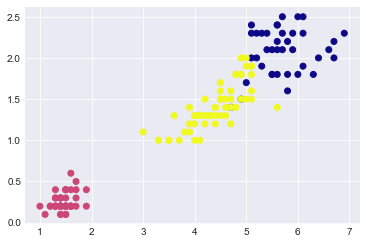

In [8]:
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=pred, cmap = 'plasma')

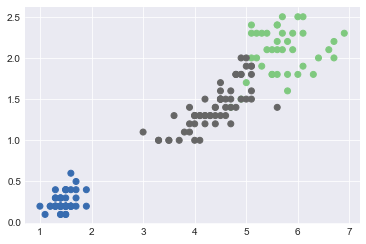

In [9]:
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=pred, cmap = plt.cm.Accent)

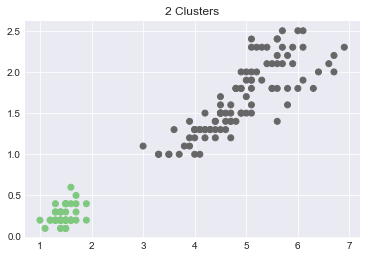

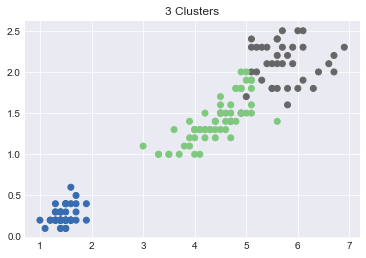

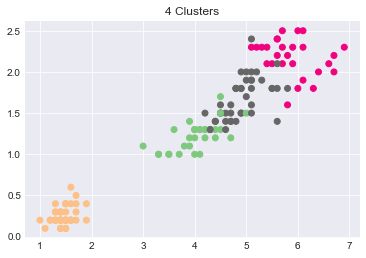

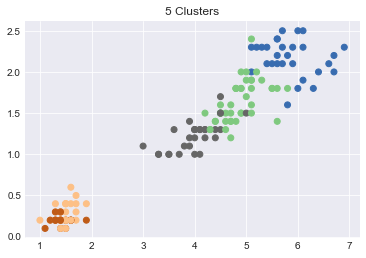

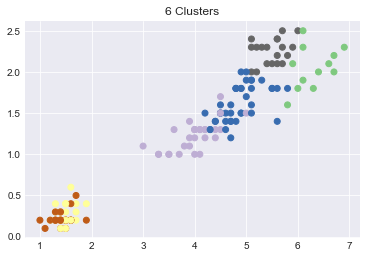

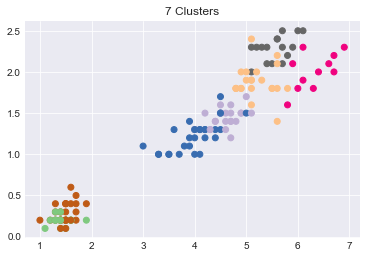

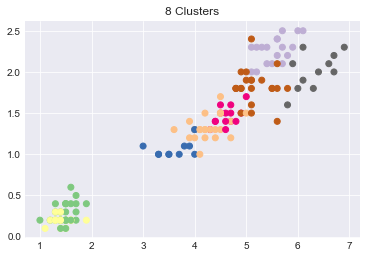

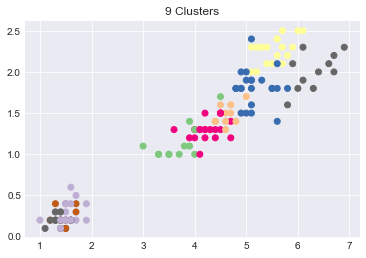

In [10]:
for i in range(2,10):
    model = KMeans(n_clusters= i, max_iter=600, algorithm= 'auto', init="k-means++")
    model.fit(iris_scaled)
    pred = model.predict(iris_scaled)
    plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c= pred, cmap = plt.cm.Accent)
    plt.title(str(i) + " Clusters")
    plt.show()

In [12]:
model.cluster_centers_

array([[0.28846154, 0.16987179, 0.46153846, 0.43910256],
       [0.21474359, 0.63301282, 0.08474576, 0.07051282],
       [0.625     , 0.44047619, 0.61380145, 0.56845238],
       [0.64814815, 0.49074074, 0.77118644, 0.90277778],
       [0.50603865, 0.31702899, 0.70375829, 0.71195652],
       [0.42460317, 0.32738095, 0.55367232, 0.50595238],
       [0.34126984, 0.85119048, 0.07990315, 0.07738095],
       [0.88888889, 0.45075758, 0.90138675, 0.79545455],
       [0.10784314, 0.43137255, 0.06779661, 0.03921569]])

In [30]:
def fun(data, center):
    for i in range(100):
        data["new"] = list(data.iloc[:,:].values)
        for i in range(len(center)):
            data["column"+str(i)]= data["new"].apply(lambda x: np.linalg.norm(np.array(x)-center[i]))
            #print(data.head())
            col=["column"+ str(i) for i in range(len(center)) ]
            col2 = np.argmin(data[col].values, axis=1)
            #print(col2)
            data["close"]=col2
            data.drop("new", axis=1, inplace=True)
            for i in col:
                data.drop(i, axis=1, inplace=True)
            l = len(center)
            
            for i in range(l):
                data1 = data[data.close==i].copy()
                #print("shape", data1.shape)
                if data1.shape[0]>0:
                    center[i]= np.mean(data1.iloc[:,:-1].values, axis=0)
                    print(center[i])
            #data.drop("close", axis=1, inplace=True)
            plt.scatter(data[data.close == 0].iloc[:,0], data[data.close == 0].iloc[:,1], s=3, color = "red")
            plt.scatter(data[data.close == 1].iloc[:,0], data[data.close == 1].iloc[:,1], s=3, color=" green")
            plt.scatter(data[data.close == 2].iloc[:,0], data[data.close == 2].iloc[:,1], s=3)
            plt.scatter(center[0][0], center[0][1], color="black", s=200, marker = "*")
            plt.scatter(center[1][0], center[1][1], color="black", s=200, marker = "*")
            plt.scatter(center[2][0], center[2][1], color="black", s=200, marker = "*")
            plt.title(str(3)+ "mean pred")
            plt.show()
        data["closet"] = col2
        return data

In [31]:
b = np.array([[2, 0.1],
             [3, 1],
             [6, 2]])

In [32]:
#b = np.random.normal(0, 3, (3,2))

In [33]:
b[1]

array([3., 1.])

In [34]:
a=fun(iris.iloc[:,2:4],b)

KeyError: "['column1', 'column2'] not in index"

In [35]:
model.cluster_centers_

array([[0.28846154, 0.16987179, 0.46153846, 0.43910256],
       [0.21474359, 0.63301282, 0.08474576, 0.07051282],
       [0.625     , 0.44047619, 0.61380145, 0.56845238],
       [0.64814815, 0.49074074, 0.77118644, 0.90277778],
       [0.50603865, 0.31702899, 0.70375829, 0.71195652],
       [0.42460317, 0.32738095, 0.55367232, 0.50595238],
       [0.34126984, 0.85119048, 0.07990315, 0.07738095],
       [0.88888889, 0.45075758, 0.90138675, 0.79545455],
       [0.10784314, 0.43137255, 0.06779661, 0.03921569]])

###### 

## Hierarchical Clustering:

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as pyplot
from sklearn.cluster import AgglomerativeClustering

In [39]:
??pdist
#shows what pdist and its functionality is

In [40]:
xdist = pdist(iris_scaled, metric = "euclidean")

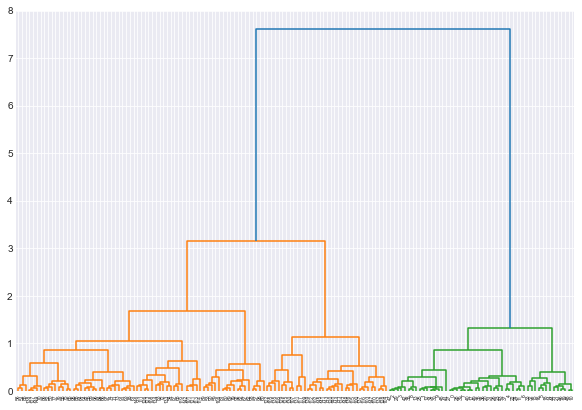

In [50]:
linked = linkage(xdist, 'ward')

plt.figure(figsize = (10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
          show_leaf_counts= True)
plt.show()

In [49]:
#{"ward", "complete", "average", "single"}
#"euclidean", "l1", "l2","manhattan", "cosine", or "precomputed".

In [51]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="l1", linkage='complete')
pred = cluster.fit_predict(iris_scaled)

In [52]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

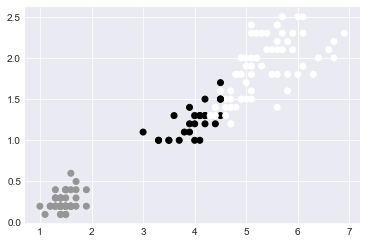

In [54]:
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=pred)

## DBSCAN

##  Read dataset:

In [67]:
from sklearn.datasets import make_moons
x,y = make_moons(100)

In [68]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [69]:
data = pd.DataFrame(x)

In [71]:
data

,0,1
0,0.284528,9.586679e-01
1,0.281651,-1.956826e-01
2,-1.000000,1.224647e-16
3,-0.801414,5.981105e-01
4,-0.159600,9.871818e-01
...,...,...
95,0.840400,-4.871818e-01
96,1.900969,6.611626e-02
97,0.161912,-4.553490e-02
98,0.050944,1.848918e-01


In [72]:
data.columns=["f1", "f2"]
data

,f1,f2
0,0.284528,9.586679e-01
1,0.281651,-1.956826e-01
2,-1.000000,1.224647e-16
3,-0.801414,5.981105e-01
4,-0.159600,9.871818e-01
...,...,...
95,0.840400,-4.871818e-01
96,1.900969,6.611626e-02
97,0.161912,-4.553490e-02
98,0.050944,1.848918e-01


In [73]:
data["class"] = y

In [74]:
data.head()

,f1,f2,class
0,0.284528,9.586679e-01,0
1,0.281651,-1.956826e-01,1
2,-1.000000,1.224647e-16,0
3,-0.801414,5.981105e-01,0
4,-0.159600,9.871818e-01,0


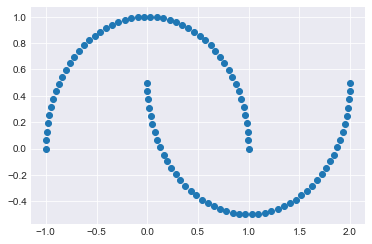

In [75]:
plt.scatter(data["f1"], data["f2"], cmap=plt.cm.Accent)

### Using KMEANS for make_moons dataset

In [78]:
model = KMeans(n_clusters=2, max_iter=600, algorithm='auto')

In [79]:
model.fit(data.iloc[:,:2])

KMeans(algorithm='auto', max_iter=600, n_clusters=2)

In [80]:
claas_pr = model.predict(data.iloc[:,:2])

In [81]:
data["class_pr"] = claas_pr

In [82]:
data.head()

,f1,f2,class,class_pr
0,0.284528,9.586679e-01,0,1
1,0.281651,-1.956826e-01,1,1
2,-1.000000,1.224647e-16,0,1
3,-0.801414,5.981105e-01,0,1
4,-0.159600,9.871818e-01,0,1


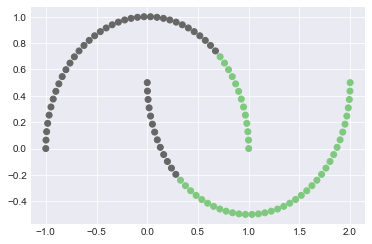

In [83]:
plt.scatter(data["f1"], data["f2"], c=data["class_pr"], cmap = plt.cm.Accent)

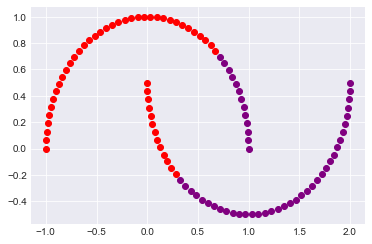

In [85]:
plt.scatter(data[data["class_pr"]==1].iloc[:,0], data[data["class_pr"]==1].iloc[:,1], color="red")
plt.scatter(data[data["class_pr"]==0].iloc[:,0], data[data["class_pr"]==0].iloc[:,1], color="purple")

In [112]:
dataa = pd.read_csv("C:/Users/Aiswarya/OneDrive/Documents/ExcelR_John/Clustering", encoding='unicode_escape')

PermissionError: [Errno 13] Permission denied: 'C:/Users/Aiswarya/OneDrive/Documents/ExcelR_John/Clustering'